In [2]:
import pandas as pd
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [3]:
df1 = pd.read_csv('kgh_d.csv')
df1.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [5]:
df2 = pd.read_csv('ca_c_f_d.csv')
df2.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


In [28]:
#Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM,
#drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").

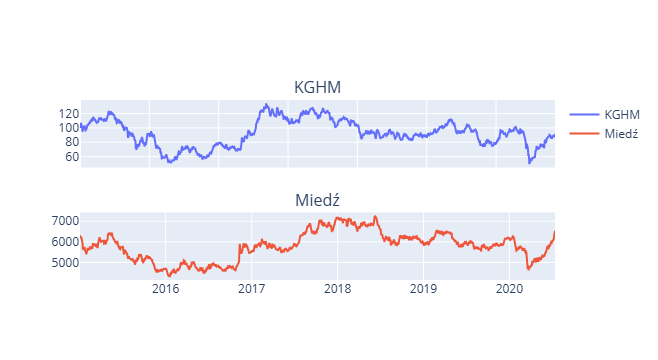

In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=['KGHM', 'Miedź'])
fig.add_trace(
    go.Scatter(y=df1['Zamkniecie'], mode='lines', name='KGHM'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=df2['Zamkniecie'],x=df2['Data'], mode='lines', name='Miedź'),
    row=2, col=1
)
fig.show()

In [ ]:
#Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi 
#w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie")

In [39]:
df_combined = pd.merge(df1[['Data', 'Zamkniecie']], df2[['Data', 'Zamkniecie']], on='Data')

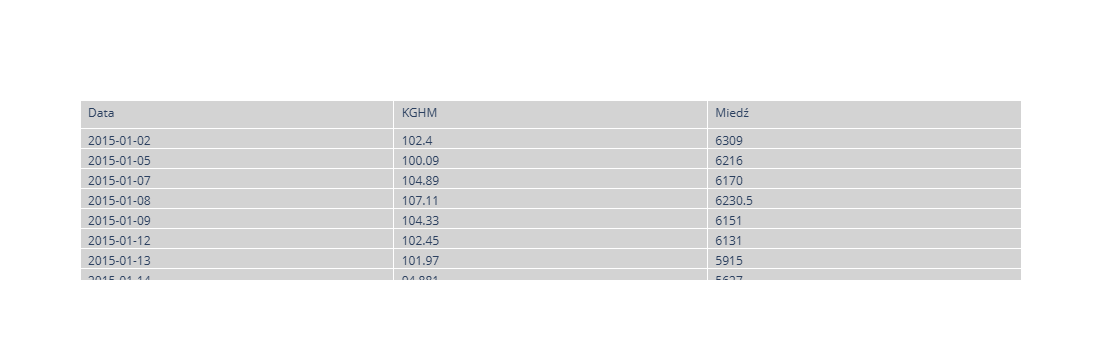

In [40]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Data', 'KGHM', 'Miedź'],
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[df_combined['Data'], df_combined['Zamkniecie_x'], df_combined['Zamkniecie_y']],
               fill_color='lightgrey',
               align='left'))
])
fig.show()                    